# K-means聚类算法
K-means 的目标是将数据集划分为 K 个簇（clusters），使得每个数据点属于距离最近的簇中心。通过反复调整簇中心的位置，K-means不断优化簇内的紧密度，从而获得尽量紧凑、彼此分离的簇。

## 算法步骤：

1.随机选择 K 个质心（初始中心点）。

2.每个数据点分配到距离最近的质心所属的簇。

3.重新计算每个簇的质心。

4.重复步骤 2 和 3，直到质心不再变化（或达到指定的迭代次数）。

## 算法优点：

1.逻辑简单。

2.处理大数据集时，该算法具有相对的可伸缩和高效率，该算法有两个收敛条件，当数据集过大或达到最大迭代次数时就会停止迭代以获得局部最优解。

3.应对密集、球状数据集时有更为突出的效果。

## 算法缺点：
1.需要手动设定K值，聚类性能对K值大小敏感。

2.对离群点和噪声点敏感，离群点和噪声点可能会自成一类。

3.只能适用于凸数据集。


In [1]:
#导入需要的包
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## 使用make_blobs函数生成模拟数据
X为300*2的二维数组，即随机生成了300个样本点，每个样本点有x轴和y轴两个特征值

y为大小为300的一维数组，即对应这300个样本点分别属于哪四类（0类、1类、2类、3类）

In [2]:
#设置随机值，方便复现
np.random.seed(42)

# numpy的默认使用科学计数法显示数据的改变办法,True是关闭科学计数显示
np.set_printoptions(suppress=True)

#n_samples=300：生成300个样本点。
#n_features=2: 每个样本点具有2个特征，不设置的话，默认为2个
#centers=4：指定数据点围绕4个中心点（即4个聚类）生成。
#cluster_std=0.60：每个聚类点的标准差为0.60，这决定了聚类点的分布宽度。
#random_state=0：确保每次生成的数据是相同的。
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)
print(X)
print(y)

[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]
 [ 3.43761754  0.26165417]
 [-1.80822253  1.59701749]
 [ 1.41372442  4.38117707]
 [-0.20493217  8.43209665]
 [-0.71109961  8.66043846]
 [-1.71237268  2.77780226]
 [-2.67000792  8.3538914 ]
 [ 1.24258802  4.50399192]
 [-2.22783649  6.89479938]
 [ 1.45513831 -0.029199  ]
 [ 0.45379179  3.95647753]
 [ 1.06923853  4.53068484]
 [ 2.56936589  0.5070483 ]
 [-1.0669061   3.13165795]
 [-1.07859101  2.20451529]
 [ 2.71506328  1.2908219 ]
 [ 1.77710994  1.18655254]
 [ 0.73436391  5.03725437]
 [-1.99648151  2.85164868]
 [-1.91828017  2.60516867]
 [-0.55552381  4.69595848]
 [ 1.6974791   0.86612328]
 [ 0.59476243  4.7096473 ]
 [-2.88024255  2.30437816]
 [ 0.18672563  4.02683656]
 [-0.51333344  7.87437368]
 [-2.05701103  7.37851598]
 [ 1.87271752  4.18069237]
 [-1.13121396  6.7665223 ]
 [-1.64428957  7.94095139]
 [-2.41933824  7.43952498]
 [-2.01606928  7.48420129]
 

## 肘部法可视化
使用肘部法来确定K-means聚类算法的最佳聚类数（K值）。

肘部法通过观察不同K值对应的聚类惯性（inertia）来选择K值。

惯性是衡量聚类内样本点分散程度的一个指标，值越小表示聚类效果越好。

肘部法认为，当K值增加到某个点时，惯性的减少速度会大幅下降，这个点就是最佳的K值。

本案例中可以明显发现，K取4时惯性的减少速度会大幅下降。

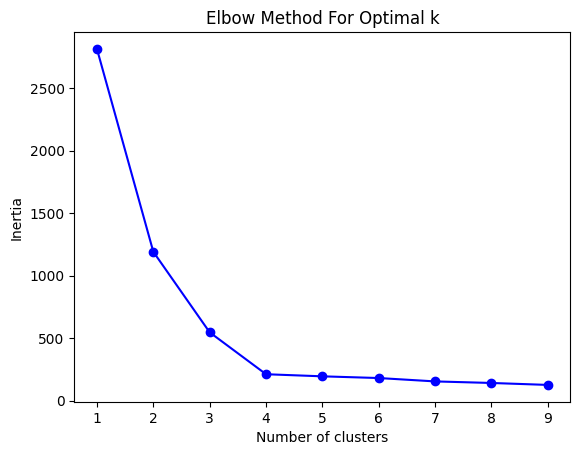

In [3]:
# 使用肘部法选择K值
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 绘制肘部法图
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [4]:
# 使用K-means进行聚类
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print("预测的结果y_kmeans为：\n",y_kmeans)
print("真实的结果y为：\n",y)

预测的结果y_kmeans为：
 [2 0 1 0 2 2 3 1 0 0 3 0 1 0 2 1 1 2 3 3 2 2 1 3 3 1 2 1 3 1 0 0 1 0 0 0 0
 0 3 2 1 3 1 1 3 3 0 3 0 2 3 2 0 2 2 3 0 3 0 2 0 1 0 3 3 3 0 2 0 3 1 3 0 3
 3 0 3 1 2 0 2 1 2 2 0 1 2 1 0 0 1 2 0 3 3 1 2 2 1 3 0 2 0 2 1 2 2 1 0 1 3
 3 2 0 2 1 0 2 2 1 3 2 3 2 2 2 2 3 2 3 0 3 3 2 0 3 3 0 1 0 0 3 1 3 1 3 0 1
 0 0 0 1 0 1 2 3 0 3 2 1 0 1 1 2 1 3 3 1 2 1 1 0 2 1 3 0 2 2 1 3 2 1 3 3 1
 1 1 1 2 0 1 3 1 1 3 3 3 1 3 0 1 3 2 3 1 0 3 0 1 0 1 3 1 1 0 3 3 2 2 1 0 2
 2 3 2 3 1 0 0 1 1 0 1 2 3 1 2 3 0 3 2 1 2 0 0 0 0 3 3 0 1 3 2 1 3 3 3 2 2
 0 1 1 3 2 0 3 1 0 1 2 2 3 3 1 2 2 2 1 0 0 2 2 1 2 2 2 0 3 0 1 2 2 0 0 0 2
 2 1 0 3]
真实的结果y为：
 [1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 

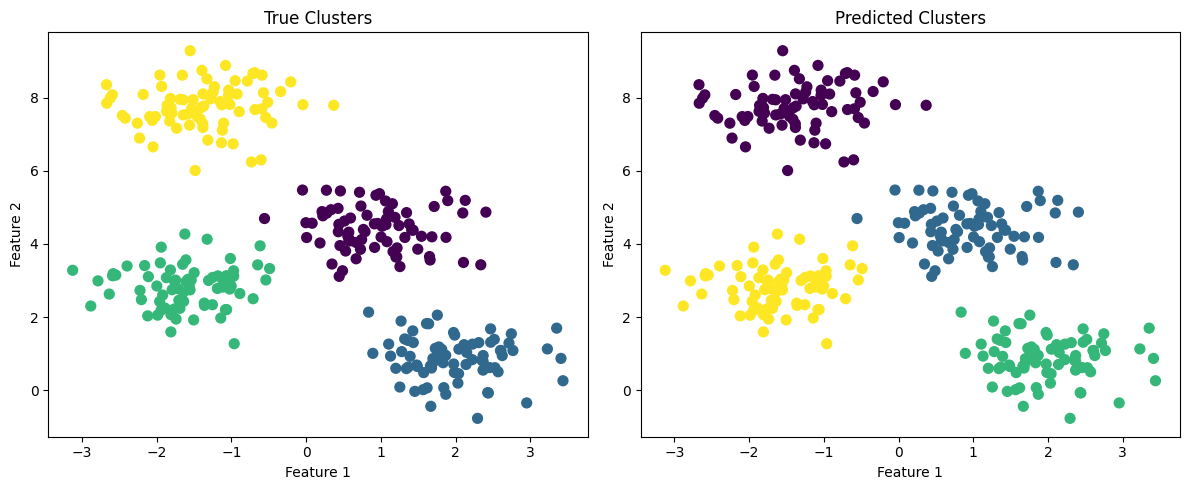

In [5]:
# 创建子图对比真实值和预测值
plt.figure(figsize=(12, 5))

# 真实值的可视化
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title("True Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 预测值的可视化
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title("Predicted Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

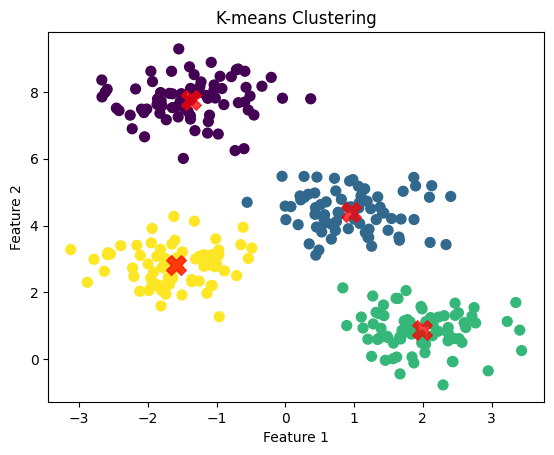

In [6]:
# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# 绘制聚类中心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()